In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import folium
from folium.plugins import MarkerCluster
import streamlit as st
from streamlit_folium import st_folium

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

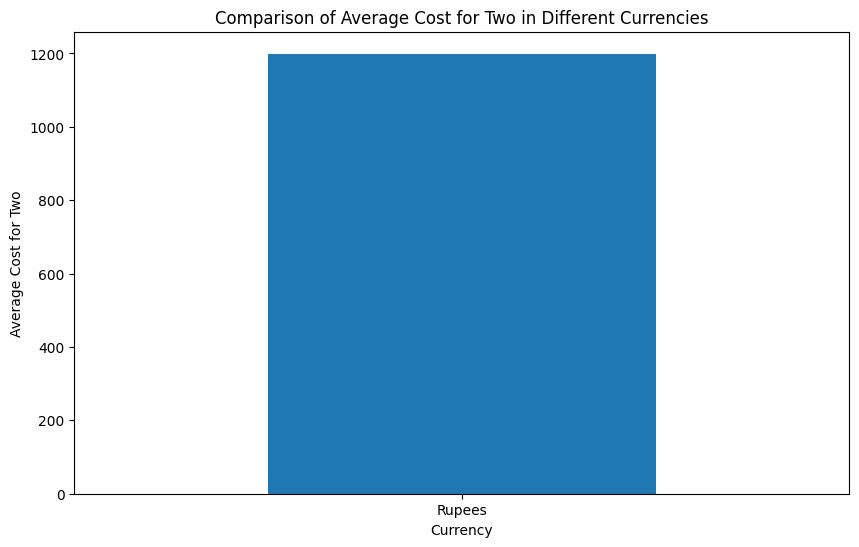

In [3]:

# Load the Zomato dataset
zomato_data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv")

# Load the country code dataset
country_code = pd.read_excel("C:/Users/manic/Downloads/Country-Code.xlsx")

# Merge the datasets on Country Code
zomato_data = pd.merge(zomato_data, country_code, how="left", on="Country Code")

# Add a column with rupees as the currency
zomato_data['Currency'] = 'Rupees'

# Check the first few rows to ensure correctness
print(zomato_data.head())

# Plot to compare Indian currency with other country's currency

plt.figure(figsize=(10, 6))
zomato_data.groupby('Currency')['Average Cost for two'].mean().plot(kind='bar')
plt.title('Comparison of Average Cost for Two in Different Currencies')
plt.xlabel('Currency')
plt.ylabel('Average Cost for Two')
plt.xticks(rotation=0)
plt.show()

In [6]:
print(zomato_data)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml郾 Gurme           208          哿stanbul   
9547        5908749               Ceviz A埕ac郾           208          哿stanbul   
9548        5915807                     Huqqa           208          哿stanbul   
9549        5916112                A侓侓k Kahve           208          哿stanbul   
9550        5927402  Walter's Coffee Roastery           208          哿stanbul   

                           

141


c:\Users\manic\Youtube harvest project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24666 (\N{CJK UNIFIED IDEOGRAPH-605A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\manic\Youtube harvest project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38852 (\N{CJK UNIFIED IDEOGRAPH-97C4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\manic\Youtube harvest project\.venv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21759 (\N{CJK UNIFIED IDEOGRAPH-54FF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


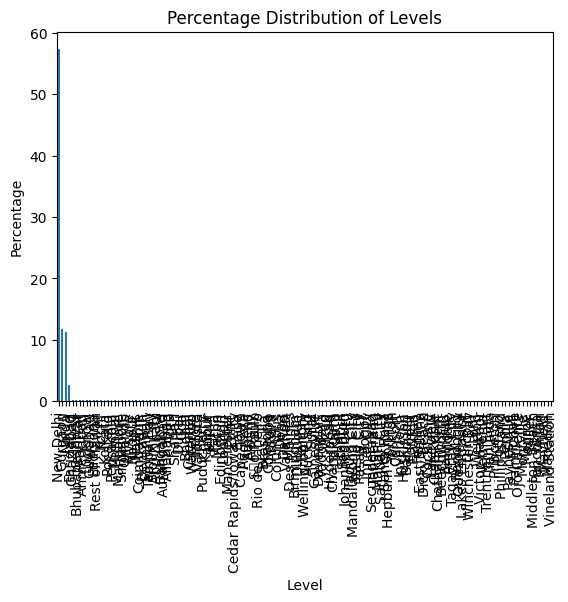

In [14]:
# Assuming 'data' is your DataFrame
percentage_distribution = (zomato_data['City'].value_counts() / len(zomato_data))*100
#print(percentage_distribution)
print(len(percentage_distribution))

# Plotting
percentage_distribution.plot(kind='bar')
plt.xlabel('Level')
plt.ylabel('Percentage')
plt.title('Percentage Distribution of Levels')
plt.show()

In [15]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [16]:
country_code.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [5]:
#1 Top 5 Cities by Count of Restaurants

# Assuming your dataframe is named 'zomato_data'
# Replace 'zomato_data' with your actual dataframe name if different

# Bar chart for count of restaurants in each city
city_counts = zomato_data['City'].value_counts().reset_index()
city_counts.columns = ['City', 'Count']
city_counts = city_counts.sort_values(by='Count', ascending=False)

# Select top 10 cities 
top_10_cities = city_counts.head(5)

# Plot bar chart with different colors for each bars
fig1 = px.bar(top_10_cities, x='City', y='Count', title='Top 5 Cities by Count of Restaurants', color='City')
fig1.show()


In [6]:
#2 Count of Restaurants Offering Online Delivery

# Bar chart for count of restaurants offering online delivery
delivery_counts = zomato_data['Has Online delivery'].value_counts().reset_index()
delivery_counts.columns = ['Has Online delivery', 'Count']

# Plot bar chart with different colors for each bar
fig2 = px.bar(delivery_counts, x='Has Online delivery', y='Count', title='Count of Restaurants Offering Online Delivery', color='Has Online delivery')
fig2.show()

In [75]:
#3 Top 10 Costly Cuisines in India

# Assuming your dataframe is named 'zomato_data'
# Replace 'zomato_data' with your actual dataframe name if different

# Filter data for restaurants in India
indian_restaurants = zomato_data[zomato_data['Country'] == 'India']

# Calculate average cost for each cuisine
cuisine_avg_cost = indian_restaurants.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
cuisine_avg_cost = cuisine_avg_cost.sort_values(by='Average Cost for two', ascending=False)

# Plot bar chart
fig = px.bar(cuisine_avg_cost.head(10), x='Cuisines', y='Average Cost for two', 
             title='Top 10 Costly Cuisines in India', color='Cuisines',
             text='Average Cost for two', 
             labels={'Average Cost for two': 'Average Cost'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(yaxis=dict(title='Average Cost'))
fig.show()


In [76]:
#4 Find the most common cuisine in each city

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Drop rows with missing values in the 'Cuisines' column
df = zomato_data.dropna(subset=['Cuisines'])

# Split cuisines and create a new row for each cuisine
df_cuisines = df['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Cuisine')
df_split = df.join(df_cuisines)

# Group by city and cuisine, count the occurrences of each cuisine in each city
city_cuisine_count = df_split.groupby(['City', 'Cuisine']).size().reset_index(name='Count')

# Find the most common cuisine in each city
city_top_cuisine = city_cuisine_count.sort_values(by=['City', 'Count'], ascending=[True, False]).groupby('City').first().reset_index()

# Create a map
map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

# Mark the locations of restaurants serving the most common cuisine in each city
marker_cluster = MarkerCluster().add_to(map)
for index, row in city_top_cuisine.iterrows():
    city = row['City']
    cuisine = row['Cuisine']
    count = row['Count']
    lat = df[df['City'] == city]['Latitude'].mean()
    lon = df[df['City'] == city]['Longitude'].mean()
    folium.Marker([lat, lon], popup=f"{city}: {cuisine} ({count} restaurants)").add_to(marker_cluster).add_to(map)

# Save the map to an HTML file
#map.save("famous_cuisine_map.html")
print("locations of restaurants serving the most common cuisine in each city")
map



locations of restaurants serving the most common cuisine in each city


In [77]:
#5 top 10 Average Cost for Two for Each Cuisine

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Drop rows with missing cuisines
zomato_data.dropna(subset=['Cuisines'], inplace=True)

# Calculate average cost for two for each cuisine
cuisine_avg_cost = zomato_data.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
cuisine_avg_cost = cuisine_avg_cost.sort_values(by='Average Cost for two', ascending=False).head(10)

# Bar chart for top 10 Average Cost for Two for Each Cuisine
fig = px.bar(cuisine_avg_cost, x='Cuisines', y='Average Cost for two', title='Top 10 Costliest Cuisines',color='Cuisines')
fig.show()


In [78]:
#6 Rating Count in Top 5 Cities

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Filter out the top 5 cities
top_cities = zomato_data['City'].value_counts().head(5).index.tolist()

# Filter the dataframe for the top 5 cities
top_cities_df = zomato_data[zomato_data['City'].isin(top_cities)]

# Count the ratings based on rating text for each city
rating_counts = top_cities_df.groupby(['City', 'Rating text']).size().reset_index(name='Count')

# Plot the bar chart with facets for each rating
fig = px.bar(rating_counts, x='City', y='Count', color='Rating text', 
             facet_col='Rating text', title='Rating Count in Top 5 Cities',
             category_orders={'Rating text': ['Excellent', 'Very Good', 'Good', 'Average', 'Not rated']})
fig.show()


In [79]:
#7 Online Delivery vs. Dine-In

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Counting the number of restaurants with online delivery and without
delivery_counts = zomato_data['Has Online delivery'].value_counts().reset_index()
delivery_counts.columns = ['Has Online delivery', 'Count']

# Creating a pie chart
fig = px.pie(delivery_counts, values='Count', names='Has Online delivery', title='Online Delivery vs. Dine-In')
fig.show()

In [85]:
#8 Top 10 Cities by Online Delivery Spending in India

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Filter data for India
df_india = zomato_data[zomato_data['Country'] == 'India']

# Group by city and calculate the total amount spent on online delivery
city_spending = df_india.groupby('City')['Average Cost for two'].sum().reset_index()
city_spending = city_spending.sort_values(by='Average Cost for two', ascending=False)

# Slice the DataFrame to select top 10 cities
top_10_cities = city_spending.head(10)

# Plotting the bar chart
fig = px.bar(top_10_cities, x='City', y='Average Cost for two', title='Top 10 Cities by Online Delivery Spending in India',color='Average Cost for two')
fig.show()


In [98]:
#9 Total Dine-in Expenditure by City in India

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Filter the data for India
df_india = zomato_data[zomato_data['Country'] == 'India']

# Group by city and calculate total expenditure on dine-in
city_dine_in_expenditure = df_india.groupby('City')['Average Cost for two'].sum().reset_index()
city_dine_in_expenditure = city_dine_in_expenditure.sort_values(by='Average Cost for two', ascending=False)


top_10 =city_dine_in_expenditure.head(10)

# Plot the bar chart

fig = px.bar(top_10, x='City', y='Average Cost for two', title='Total Dine-in Expenditure by City in India',color = 'City')
fig.show()


In [104]:
#10 Top 10 Cities by Average Cost for Two

# Assuming your dataframe is named 'df'
# Replace 'df' with your actual dataframe name if different

# Calculate average cost for two in each city
city_avg_cost = zomato_data.groupby('City')['Average Cost for two'].mean().reset_index()
city_avg_cost = city_avg_cost.sort_values(by='Average Cost for two', ascending=False)

# Select top 10 cities
top_10_cities = city_avg_cost.head(10)

# Create bar chart for top 10 cities
bar_fig = px.bar(top_10_cities, x='City', y='Average Cost for two', 
                  title='Top 10 Cities by Average Cost for Two',
                  labels={'Average Cost for two': 'Average Cost for Two'})
bar_fig.show()


In [ ]:
with st.sidebar:
    st.title(":orange[Zomato Data Analysis and Visualization]")
    st.header("Notes")
    st.caption("The all data is taken from the below link")
    st.caption("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv")

# Load the Zomato dataset
zomato_data = pd.read_csv("https://raw.githubusercontent.com/nethajinirmal13/Training-datasets/main/zomato/zomato.csv")

# Load the country code dataset
country_code = pd.read_excel("C:/Users/manic/Downloads/Country-Code.xlsx")

# Merge the datasets on Country Code
zomato_data = pd.merge(zomato_data, country_code, how="left", on="Country Code")

# Add a column with rupees as the currency
zomato_data['Currency'] = 'Rupees'


question = st.selectbox("select your question",("1. Top 5 Cities by Count of Restaurants",
                                                "2. Count of Restaurants Offering Online Delivery",
                                                "3. Top 10 Costly Cuisines in India",
                                                "4. The most common cuisine in each city",
                                                "5. Top 10 Average Cost for Two for Each Cuisine",
                                                "6. Rating Count in Top 5 Cities",
                                                "7. Online Delivery vs. Dine-In",
                                                "8. Top 10 Cities by Online Delivery Spending in India",
                                                "9. Total Dine-in Expenditure by City in India",
                                                "10. Top 10 Cities by Average Cost for Two"))



if question == "1. Top 5 Cities by Count of Restaurants":

    # Bar chart for count of restaurants in each city
    city_counts = zomato_data['City'].value_counts().reset_index()
    city_counts.columns = ['City', 'Count']
    city_counts = city_counts.sort_values(by='Count', ascending=False)

    # Select top 10 cities 
    top_10_cities = city_counts.head(5)

    # Plot bar chart with different colors for each bars
    fig1 = px.bar(top_10_cities, x='City', y='Count', title='Top 5 Cities by Count of Restaurants', color='City')
    #fig1.show()
    st.plotly_chart(fig1)


elif question == "2. Count of Restaurants Offering Online Delivery":

    # Bar chart for count of restaurants offering online delivery
    delivery_counts = zomato_data['Has Online delivery'].value_counts().reset_index()
    delivery_counts.columns = ['Has Online delivery', 'Count']

    # Plot bar chart with different colors for each bar
    fig2 = px.bar(delivery_counts, x='Has Online delivery', y='Count', title='Count of Restaurants Offering Online Delivery', color='Has Online delivery')
    #fig2.show()
    st.plotly_chart(fig2)


elif question == "3. Top 10 Costly Cuisines in India":
    # Filter data for restaurants in India
    indian_restaurants = zomato_data[zomato_data['Country'] == 'India']

    # Calculate average cost for each cuisine
    cuisine_avg_cost = indian_restaurants.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
    cuisine_avg_cost = cuisine_avg_cost.sort_values(by='Average Cost for two', ascending=False)

    # Plot bar chart
    fig = px.bar(cuisine_avg_cost.head(10), x='Cuisines', y='Average Cost for two', 
                title='Top 10 Costly Cuisines in India', color='Cuisines',
                text='Average Cost for two', 
                labels={'Average Cost for two': 'Average Cost'})
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    fig.update_layout(yaxis=dict(title='Average Cost'))
    #fig.show()
    st.plotly_chart(fig)


elif question == "4. The most common cuisine in each city":
    # Drop rows with missing values in the 'Cuisines' column
    df = zomato_data.dropna(subset=['Cuisines'])

    # Split cuisines and create a new row for each cuisine
    df_cuisines = df['Cuisines'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).rename('Cuisine')
    df_split = df.join(df_cuisines)

    # Group by city and cuisine, count the occurrences of each cuisine in each city
    city_cuisine_count = df_split.groupby(['City', 'Cuisine']).size().reset_index(name='Count')

    # Find the most common cuisine in each city
    city_top_cuisine = city_cuisine_count.sort_values(by=['City', 'Count'], ascending=[True, False]).groupby('City').first().reset_index()

    # Create a map
    map = folium.Map(location=[df['Latitude'].mean(), df['Longitude'].mean()], zoom_start=10)

    # Mark the locations of restaurants serving the most common cuisine in each city
    marker_cluster = MarkerCluster().add_to(map)
    for index, row in city_top_cuisine.iterrows():
        city = row['City']
        cuisine = row['Cuisine']
        count = row['Count']
        lat = df[df['City'] == city]['Latitude'].mean()
        lon = df[df['City'] == city]['Longitude'].mean()
        folium.Marker([lat, lon], popup=f"{city}: {cuisine} ({count} restaurants)").add_to(marker_cluster).add_to(map)

    # Save the map to an HTML file
    #map.save("famous_cuisine_map.html")
    #print("locations of restaurants serving the most common cuisine in each city")
    st_folium(map)


elif question == "5. Top 10 Average Cost for Two for Each Cuisine":


    # Drop rows with missing cuisines
    zomato_data.dropna(subset=['Cuisines'], inplace=True)

    # Calculate average cost for two for each cuisine
    cuisine_avg_cost = zomato_data.groupby('Cuisines')['Average Cost for two'].mean().reset_index()
    cuisine_avg_cost = cuisine_avg_cost.sort_values(by='Average Cost for two', ascending=False).head(10)

    # Bar chart for top 10 Average Cost for Two for Each Cuisine
    fig = px.bar(cuisine_avg_cost, x='Cuisines', y='Average Cost for two', title='Top 10 Costliest Cuisines',color='Cuisines')
    #fig.show()
    st.plotly_chart(fig)


elif question == "6. Rating Count in Top 5 Cities":

    # Filter out the top 5 cities
    top_cities = zomato_data['City'].value_counts().head(5).index.tolist()

    # Filter the dataframe for the top 5 cities
    top_cities_df = zomato_data[zomato_data['City'].isin(top_cities)]

    # Count the ratings based on rating text for each city
    rating_counts = top_cities_df.groupby(['City', 'Rating text']).size().reset_index(name='Count')

    # Plot the bar chart with facets for each rating
    fig = px.bar(rating_counts, x='City', y='Count', color='Rating text', 
                facet_col='Rating text', title='Rating Count in Top 5 Cities',
                category_orders={'Rating text': ['Excellent', 'Very Good', 'Good', 'Average', 'Not rated']})
    #fig.show()
    st.plotly_chart(fig)


elif question == "7. Online Delivery vs. Dine-In":

    # Counting the number of restaurants with online delivery and without
    delivery_counts = zomato_data['Has Online delivery'].value_counts().reset_index()
    delivery_counts.columns = ['Has Online delivery', 'Count']

    # Creating a pie chart
    fig = px.pie(delivery_counts, values='Count', names='Has Online delivery', title='Online Delivery vs. Dine-In')
    #fig.show()
    st.plotly_chart(fig)


elif question == "8. Top 10 Cities by Online Delivery Spending in India":

    # Filter data for India
    df_india = zomato_data[zomato_data['Country'] == 'India']

    # Group by city and calculate the total amount spent on online delivery
    city_spending = df_india.groupby('City')['Average Cost for two'].sum().reset_index()
    city_spending = city_spending.sort_values(by='Average Cost for two', ascending=False)

    # Slice the DataFrame to select top 10 cities
    top_10_cities = city_spending.head(10)

    # Plotting the bar chart
    fig = px.bar(top_10_cities, x='City', y='Average Cost for two', title='Top 10 Cities by Online Delivery Spending in India',color='Average Cost for two')
    #fig.show()
    st.plotly_chart(fig)


elif question == "9. Total Dine-in Expenditure by City in India":

    # Filter the data for India
    df_india = zomato_data[zomato_data['Country'] == 'India']

    # Group by city and calculate total expenditure on dine-in
    city_dine_in_expenditure = df_india.groupby('City')['Average Cost for two'].sum().reset_index()
    city_dine_in_expenditure = city_dine_in_expenditure.sort_values(by='Average Cost for two', ascending=False)


    top_10 =city_dine_in_expenditure.head(10)

    # Plot the bar chart

    fig = px.bar(top_10, x='City', y='Average Cost for two', title='Total Dine-in Expenditure by City in India',color = 'City')
    #fig.show()
    st.plotly_chart(fig)


elif question == "10. Top 10 Cities by Average Cost for Two":

    # Calculate average cost for two in each city
    city_avg_cost = zomato_data.groupby('City')['Average Cost for two'].mean().reset_index()
    city_avg_cost = city_avg_cost.sort_values(by='Average Cost for two', ascending=False)

    # Select top 10 cities
    top_10_cities = city_avg_cost.head(10)

    # Create bar chart for top 10 cities
    bar_fig = px.bar(top_10_cities, x='City', y='Average Cost for two', 
                    title='Top 10 Cities by Average Cost for Two',
                    labels={'Average Cost for two': 'Average Cost for Two'})
    #bar_fig.show()
    st.plotly_chart(bar_fig)